## Inferential Visualizations
- Look at feature loadings.
- Look at how accurate your predictions are.
- Is there a pattern to your errors? Consider reworking your model to address this.

In [80]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [81]:
# Access scaled & Test/Train-Split variables from Notebooks 02 & 03
%store -r X_train
%store -r X_test
%store -r X_train_ss
%store -r X_test_ss
%store -r y_train
%store -r y_test

In [82]:
# List ID of X-features included in Linear Regression Model
features =['Year Remod/Add', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area', 'Gr Liv Area', 'Overall Qual']

In [105]:
lm = LinearRegression()
lm.fit(X_train_ss,y_train)
# Create predictions using the `lm` object.
y_pred = lm.predict(X_test_ss)

In [106]:
# Verify dimensions in X and y represent an equal number of observations in each, n = No. of rows
print('X:        ', X_test.shape) # X.shape equals (n,p)
print('y_actual: ', y_test.shape) # y.shape equals (n, null)
print('y_pred: ', y_pred.shape)

X:         (513, 7)
y_actual:  (513,)
y_pred:  (513,)


In [102]:
y_pred;

### LINE Assumptions: Linearity
- y is linearly related to X

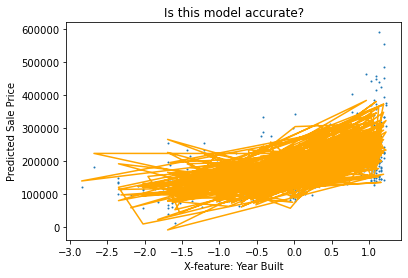

In [139]:
# Plot the predictions to gain a sense of the accuracy of the model
plt.scatter(X_test[:,1], y_test, s = 1);
plt.plot(X_test[:,1], y_pred, color = 'orange');
#plt.xlim(0, 50)
#plt.ylim(0, 10);
plt.xlabel(f'X-feature: Year Built');
plt.ylabel('Predicted Sale Price');
plt.title(f'Is this model accurate?');

### LINE Assumptions: Normality of Errors

Mean of resids: -180.88


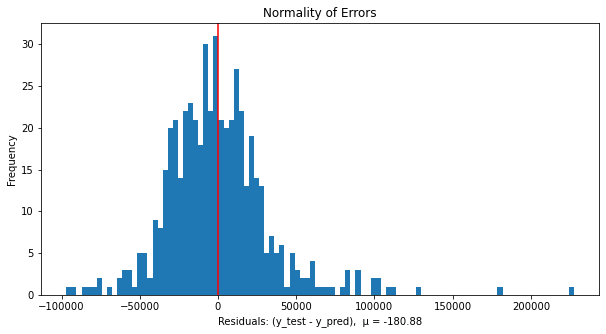

In [129]:
# N - Normality of errors
resids = y_test - y_pred
plt.figure(figsize = (10, 5));
plt.hist(resids, bins=100);
plt.axvline(0,color='red')
plt.xlabel(f'Residuals: (y_test - y_pred),  \u03BC = {round(resids.mean(),2)}');
plt.ylabel('Frequency');
plt.title(f'Normality of Errors');
print(f'Mean of resids: {round(resids.mean(),2)}')

### LINE Assumptions: Equal Variance of Errors

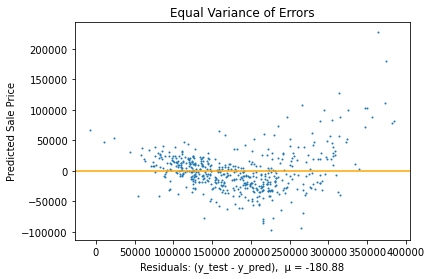

In [134]:
# E-Equal Variance of Errors: errors should have consistent pattern for all X-values, resids should have no relationship w/ X
plt.scatter(y_pred, resids, s=1)
plt.axhline(resids.mean(), color="orange");
plt.xlabel(f'Residuals: (y_test - y_pred),  \u03BC = {round(resids.mean(),2)}');
plt.ylabel(f'Predicted Sale Price');
plt.title(f'Equal Variance of Errors');

### Root Mean Squared Error

In [136]:
# Score it: Evaluate the model locally with training values of Sale Price
# Mean Squared Error (MSE)
MSE = metrics.mean_squared_error(y_test,y_pred)
print(f'MSE: {MSE:,.2f}')
# Root Mean Squared Error (RMSE)
RMSE = metrics.mean_squared_error(y_test,y_pred,squared=False)
print(f'RMSE: {RMSE:,.2f}')

MSE: 1,130,474,963.52
RMSE: 33,622.54
